# **Employee Retriction Prediction (Part 2. ML)**
Final Project Purwadhika JCDS-10

Cahyo Pambudi Utomo

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

%matplotlib inline

In [2]:
import warnings 
warnings.filterwarnings('ignore')

In [3]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, recall_score, precision_score, f1_score, accuracy_score, log_loss, roc_auc_score, auc, roc_curve
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler, StandardScaler, RobustScaler
from sklearn.utils import resample

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [5]:
from xgboost import XGBClassifier
import joblib
from imblearn.over_sampling import SMOTE

# Load Dataset

In [6]:
df= pd.read_csv('/Users/cahyopambudiutomo/Documents/Purwadhika/Final Project/JCDS Cahyo/Dataset/data_clean.csv')

In [7]:
df.head()

,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,WorkingHours
0,3.0,4.0,2.0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,Healthcare Representative,Married,131160,1.0,11,0,1.0,6,1,0,0,3,3,6.870229
1,3.0,2.0,4.0,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,Single,41890,0.0,23,1,6.0,3,5,1,4,2,4,7.315971
2,2.0,2.0,1.0,32,No,Travel_Frequently,Research & Development,17,4,Other,Male,4,Sales Executive,Married,193280,1.0,15,3,5.0,2,5,0,3,3,3,6.816081
3,4.0,4.0,3.0,38,No,Non-Travel,Research & Development,2,5,Life Sciences,Male,3,Human Resources,Married,83210,3.0,11,3,13.0,5,8,7,5,2,3,6.789215
4,4.0,1.0,3.0,32,No,Travel_Rarely,Research & Development,10,1,Medical,Male,1,Sales Executive,Single,23420,4.0,12,2,9.0,2,6,0,4,3,3,7.877561


In [8]:
df.shape

(4410, 26)

In [9]:
df.describe()

,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,DistanceFromHome,Education,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,WorkingHours
count,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,2.725170,2.729478,2.763492,36.923810,9.192517,2.912925,2.063946,65029.312925,2.691837,15.209524,0.793878,11.277324,2.799320,7.008163,2.187755,4.123129,2.729932,3.153741,7.314363
std,1.089852,1.098904,0.703541,9.133301,8.105026,1.023933,1.106689,47068.888559,2.493912,3.659108,0.851883,7.774490,1.288978,6.125135,3.221699,3.567327,0.711400,0.360742,1.330769
min,1.000000,1.000000,1.000000,18.000000,1.000000,1.000000,1.000000,10090.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,5.416880
25%,2.000000,2.000000,2.000000,30.000000,2.000000,2.000000,1.000000,29110.000000,1.000000,12.000000,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000,2.000000,3.000000,6.279408
50%,3.000000,3.000000,3.000000,36.000000,7.000000,3.000000,2.000000,49190.000000,2.000000,14.000000,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000,3.000000,3.000000,7.011174
75%,4.000000,4.000000,3.000000,43.000000,14.000000,4.000000,3.000000,83800.000000,4.000000,18.000000,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000,3.000000,3.000000,7.900785
max,4.000000,4.000000,4.000000,60.000000,29.000000,5.000000,5.000000,199990.000000,9.000000,25.000000,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000,4.000000,4.000000,10.937261


In [10]:
dfDesc = []

for i in df.columns:
    dfDesc.append([
        i,
        df[i].dtypes,
        df[i].isna().sum(),
        (((df[i].isna().sum()) / len(df)) * 100).round(2),
        df[i].nunique(),
        df[i].drop_duplicates().sample(2).values
    ])

In [11]:
pd.DataFrame(dfDesc, columns= ['Data Features', 'Data Type', 'Null', 'Null (%)', 'Unique', 'Unique Sample'])

,Data Features,Data Type,Null,Null (%),Unique,Unique Sample
0,EnvironmentSatisfaction,float64,0,0.0,4,"[4.0, 1.0]"
1,JobSatisfaction,float64,0,0.0,4,"[2.0, 3.0]"
2,WorkLifeBalance,float64,0,0.0,4,"[3.0, 1.0]"
3,Age,int64,0,0.0,43,"[36, 18]"
4,Attrition,object,0,0.0,2,"[Yes, No]"
5,BusinessTravel,object,0,0.0,3,"[Non-Travel, Travel_Rarely]"
6,Department,object,0,0.0,3,"[Sales, Human Resources]"
7,DistanceFromHome,int64,0,0.0,29,"[24, 23]"
8,Education,int64,0,0.0,5,"[4, 3]"
9,EducationField,object,0,0.0,6,"[Life Sciences, Human Resources]"


In [12]:
df_num= df._get_numeric_data().columns
df_cat= list(set(df.columns) - set(df_num))
print(f'Numerical: {df_num}')
print(f'Categorical: {df_cat}')

Numerical: Index(['EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'Age',
       'DistanceFromHome', 'Education', 'JobLevel', 'MonthlyIncome',
       'NumCompaniesWorked', 'PercentSalaryHike', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'JobInvolvement',
       'PerformanceRating', 'WorkingHours'],
      dtype='object')
Categorical: ['EducationField', 'Department', 'Attrition', 'JobRole', 'BusinessTravel', 'Gender', 'MaritalStatus']


# Preprocessing and Encoding Data

In [13]:
# Correcting Data Type

import math
for i in range(len(df)):
    df.EnvironmentSatisfaction[i] = math.ceil(df.EnvironmentSatisfaction[i])
    df.JobSatisfaction[i] = math.ceil(df.JobSatisfaction[i])
    df.WorkLifeBalance[i] = math.ceil(df.WorkLifeBalance[i])
    df.NumCompaniesWorked[i] = math.ceil(df.NumCompaniesWorked[i])
    df.TotalWorkingYears[i] = math.ceil(df.TotalWorkingYears[i])
    df.WorkingHours[i] = math.ceil(df.WorkingHours[i])
df['EnvironmentSatisfaction'] = df['EnvironmentSatisfaction'].astype(int)
df['JobSatisfaction'] = df['JobSatisfaction'].astype(int)
df['WorkLifeBalance'] = df['WorkLifeBalance'].astype(int)
df['NumCompaniesWorked'] = df['NumCompaniesWorked'].astype(int)
df['TotalWorkingYears'] = df['TotalWorkingYears'].astype(int)
df['WorkingHours'] = df['WorkingHours'].astype(int)

In [14]:
df['Attrition']= df['Attrition'].map({'No': 0, 'Yes': 1})
df['BusinessTravel']= df['BusinessTravel'].map({'Non-Travel':0,'Travel_Rarely': 1, 'Travel_Frequently': 2})
df['Department']=df['Department'].map({'Sales':0,'Research & Development':1,'Human Resources':2})
df['EducationField']= df['EducationField'].map({'Life Sciences': 0, 'Other': 1, 'Medical':2, 'Marketing':3, 
                                                'Technical Degree':4, 'Human Resources':5})
df['Gender']= df['Gender'].map({'Female':0, 'Male':1})
df['JobRole']=df['JobRole'].map({'Healthcare Representative':0, 'Research Scientist':1, 'Sales Executive':2, 
                                'Human Resources':3, 'Research Director':4, 'Laboratory Technician':5, 'Manufacturing Director':6,
                                'Sales Representative':7, 'Manager':8})
df['MaritalStatus']= df['MaritalStatus'].map({'Married': 0, 'Single': 1, 'Divorced':2})

In [15]:
df.head()

,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,WorkingHours
0,3,4,2,51,0,1,0,6,2,0,0,1,0,0,131160,1,11,0,1,6,1,0,0,3,3,7
1,3,2,4,31,1,2,1,10,1,0,0,1,1,1,41890,0,23,1,6,3,5,1,4,2,4,8
2,2,2,1,32,0,2,1,17,4,1,1,4,2,0,193280,1,15,3,5,2,5,0,3,3,3,7
3,4,4,3,38,0,0,1,2,5,0,1,3,3,0,83210,3,11,3,13,5,8,7,5,2,3,7
4,4,1,3,32,0,1,1,10,1,2,1,1,2,1,23420,4,12,2,9,2,6,0,4,3,3,8


In [16]:
correlation= df.corr()
correlation['Attrition'].sort_values(ascending = False)[1:]

# We will drop features that has low correlation with attrition

WorkingHours               0.194561
BusinessTravel             0.127006
Department                 0.048206
NumCompaniesWorked         0.042064
PercentSalaryHike          0.032533
PerformanceRating          0.023403
Gender                     0.018125
MaritalStatus              0.011195
EducationField             0.004352
StockOptionLevel          -0.006839
DistanceFromHome          -0.009730
JobLevel                  -0.010290
Education                 -0.015111
JobInvolvement            -0.015588
MonthlyIncome             -0.031176
JobRole                   -0.031255
YearsSinceLastPromotion   -0.033019
TrainingTimesLastYear     -0.049431
WorkLifeBalance           -0.062975
EnvironmentSatisfaction   -0.101625
JobSatisfaction           -0.103068
YearsAtCompany            -0.134392
YearsWithCurrManager      -0.156199
Age                       -0.159205
TotalWorkingYears         -0.170162
Name: Attrition, dtype: float64

In [17]:
df.columns

Index(['EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'Age',
       'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'Gender', 'JobLevel', 'JobRole',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'JobInvolvement', 'PerformanceRating',
       'WorkingHours'],
      dtype='object')

In [18]:
df.drop(columns=['WorkLifeBalance', 'Department', 'DistanceFromHome', 'Education', 
                  'EducationField', 'Gender', 'JobLevel', 'JobRole', 'MaritalStatus', 
                  'NumCompaniesWorked','PercentSalaryHike', 'StockOptionLevel', 'TrainingTimesLastYear', 
                  'YearsSinceLastPromotion', 'JobInvolvement', 'PerformanceRating'],axis=1,inplace=True)

In [19]:
df.head()

,EnvironmentSatisfaction,JobSatisfaction,Age,Attrition,BusinessTravel,MonthlyIncome,TotalWorkingYears,YearsAtCompany,YearsWithCurrManager,WorkingHours
0,3,4,51,0,1,131160,1,1,0,7
1,3,2,31,1,2,41890,6,5,4,8
2,2,2,32,0,2,193280,5,5,3,7
3,4,4,38,0,0,83210,13,8,5,7
4,4,1,32,0,1,23420,9,6,4,8


In [20]:
df.dtypes

EnvironmentSatisfaction    int64
JobSatisfaction            int64
Age                        int64
Attrition                  int64
BusinessTravel             int64
MonthlyIncome              int64
TotalWorkingYears          int64
YearsAtCompany             int64
YearsWithCurrManager       int64
WorkingHours               int64
dtype: object

In [21]:
data_encode= df.to_csv('/Users/cahyopambudiutomo/Documents/Purwadhika/Final Project/JCDS Cahyo/Dataset/data_encoded.csv', index= False)

# Feature Selection

In [22]:
df['Attrition'].value_counts()

# Data Imbalance

0    3699
1     711
Name: Attrition, dtype: int64

In [23]:
X= df.drop(columns= 'Attrition')
y= df['Attrition']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X ,y ,stratify = y, train_size=.80, random_state=42)

# SMOTE for Imbalance Data

In [25]:
sm = SMOTE(random_state = 42)
X_train_sm, y_train_sm = sm.fit_sample(X_train, y_train)

In [27]:
df_smote = pd.concat([X_train_sm, y_train_sm], axis = 1)
df_smote['Attrition'].value_counts()

1    2959
0    2959
Name: Attrition, dtype: int64

# Scaling

In [28]:
scaler_rs = RobustScaler()
X_train_sm_rs = scaler_rs.fit_transform(X_train_sm)
X_test_rs = scaler_rs.transform(X_test)

# Machine Learning

## Logistic Regression

              precision    recall  f1-score   support

           0       0.91      0.73      0.81       740
           1       0.31      0.63      0.41       142

    accuracy                           0.71       882
   macro avg       0.61      0.68      0.61       882
weighted avg       0.81      0.71      0.74       882

Train Recall Score LogReg : 0.7404528556944914
Test Recall Score LogReg : 0.6267605633802817


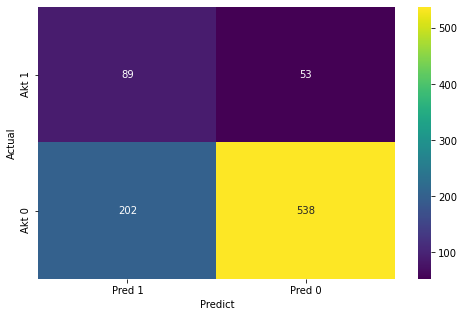

,Pred 1,Pred 0
Akt 1,89,53
Akt 0,202,538


In [31]:
LogReg= LogisticRegression(random_state=42)
LogReg.fit(X_train_sm_rs, y_train_sm)
y_pred= LogReg.predict(X_test_rs)
y_pred_train= LogReg.predict(X_train_sm_rs)

acc_LogReg = accuracy_score(y_test, y_pred)
prec_LogReg = precision_score(y_test, y_pred)
rec_LogReg_test = recall_score(y_test, y_pred, pos_label=1)
rec_LogReg_train= recall_score(y_train_sm, y_pred_train)
f1_LogReg = f1_score(y_test, y_pred)
recall_score(y_train_sm, y_pred_train, pos_label=0)
print(classification_report(y_test, y_pred))

print(f"Train Recall Score LogReg : {rec_LogReg_train}")
print(f"Test Recall Score LogReg : {rec_LogReg_test}")

plt.subplots(figsize=(8,5))
cm = confusion_matrix(y_test, y_pred, labels=[1, 0])
df_cm = pd.DataFrame(data=cm, columns=['Pred 1', 'Pred 0'], index = ['Akt 1', 'Akt 0'])
sns.heatmap(df_cm, cmap= 'viridis', fmt= '.0f', annot=True)
plt.xlabel("Predict")
plt.ylabel("Actual")
plt.show()

df_cm

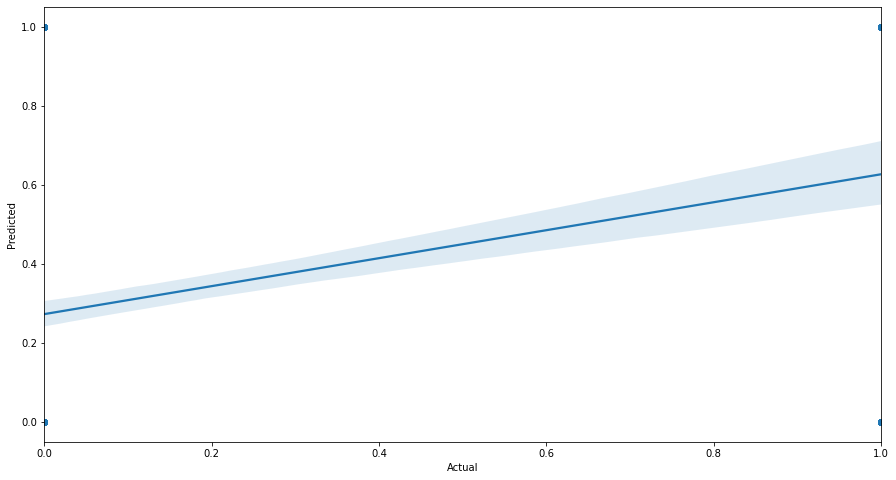

In [32]:
plt.figure(figsize=(15,8))
sns.regplot(y_test,y_pred,fit_reg =True)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

## K Nearest Neighbor

              precision    recall  f1-score   support

           0       0.95      0.77      0.85       740
           1       0.40      0.77      0.52       142

    accuracy                           0.77       882
   macro avg       0.67      0.77      0.69       882
weighted avg       0.86      0.77      0.80       882

Train Recall Score KNN : 0.895234876647516
Test Recall Score KNN : 0.7746478873239436


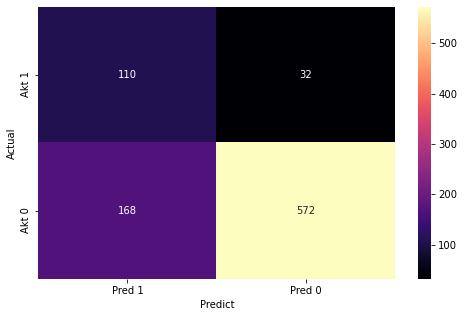

In [34]:
KNN = KNeighborsClassifier()
KNN.fit(X_train_sm, y_train_sm)
y_pred= KNN.predict(X_test)
y_pred_train= KNN.predict(X_train_sm)

acc_KNN = accuracy_score(y_test, y_pred)
prec_KNN = precision_score(y_test, y_pred)
rec_KNN_test = recall_score(y_test, y_pred, pos_label=1)
rec_KNN_train= recall_score(y_train_sm, y_pred_train)
f1_KNN = f1_score(y_test, y_pred)
recall_score(y_test, y_pred, pos_label=0)
print(classification_report(y_test, y_pred))

print(f"Train Recall Score KNN : {rec_KNN_train}")
print(f"Test Recall Score KNN : {rec_KNN_test}")

plt.subplots(figsize=(8,5))
cm = confusion_matrix(y_test, y_pred, labels=[1, 0])
df_cm = pd.DataFrame(data=cm, columns=['Pred 1', 'Pred 0'], index = ['Akt 1', 'Akt 0'])
sns.heatmap(df_cm, cmap= 'magma', fmt= '.0f', annot=True)
plt.xlabel("Predict")
plt.ylabel("Actual")
plt.show()

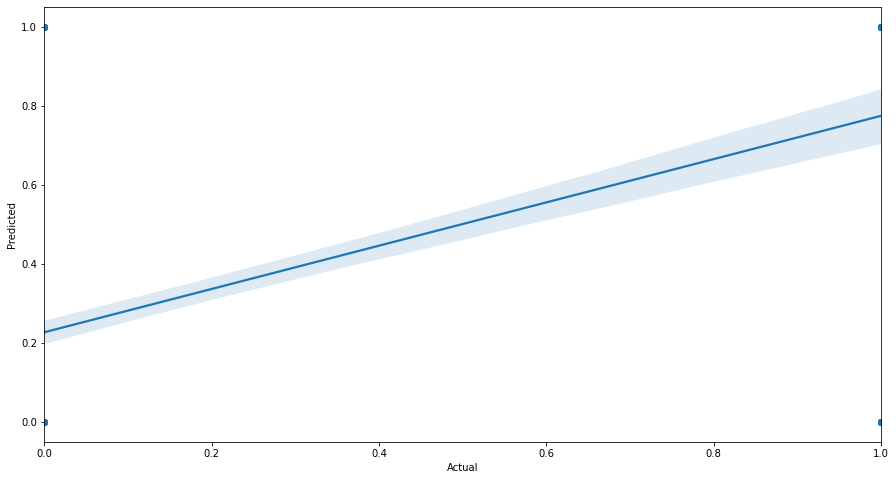

In [35]:
plt.figure(figsize=(15,8))
sns.regplot(y_test,y_pred,fit_reg =True)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

## Random Forest Classifier

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       740
           1       1.00      0.98      0.99       142

    accuracy                           1.00       882
   macro avg       1.00      0.99      0.99       882
weighted avg       1.00      1.00      1.00       882

Train Recall Score RF : 1.0
Test Recall Score RF : 0.9788732394366197


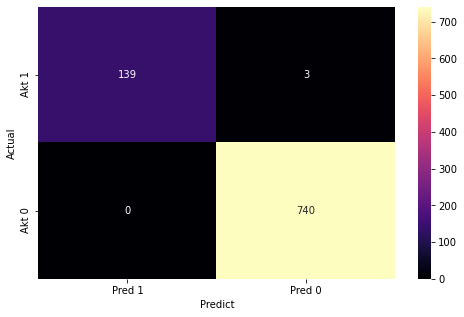

In [36]:
RF = RandomForestClassifier(n_estimators=100,random_state=1)
RF.fit(X_train_sm, y_train_sm)
y_pred= RF.predict(X_test)
y_pred_train = RF.predict(X_train_sm)

acc_RF = accuracy_score(y_test, y_pred)
prec_RF = precision_score(y_test, y_pred)
rec_RF_test = recall_score(y_test, y_pred, pos_label=1)
rec_RF_train= recall_score(y_train_sm, y_pred_train)
f1_RF = f1_score(y_test, y_pred)
recall_score(y_test, y_pred, pos_label=0)
print(classification_report(y_test, y_pred))

print(f"Train Recall Score RF : {rec_RF_train}")
print(f"Test Recall Score RF : {rec_RF_test}")

plt.subplots(figsize=(8,5))
cm = confusion_matrix(y_test, y_pred, labels=[1, 0])
df_cm = pd.DataFrame(data=cm, columns=['Pred 1', 'Pred 0'], index = ['Akt 1', 'Akt 0'])
sns.heatmap(df_cm, cmap= 'magma', fmt= '.0f', annot=True)
plt.xlabel("Predict")
plt.ylabel("Actual")
plt.show()

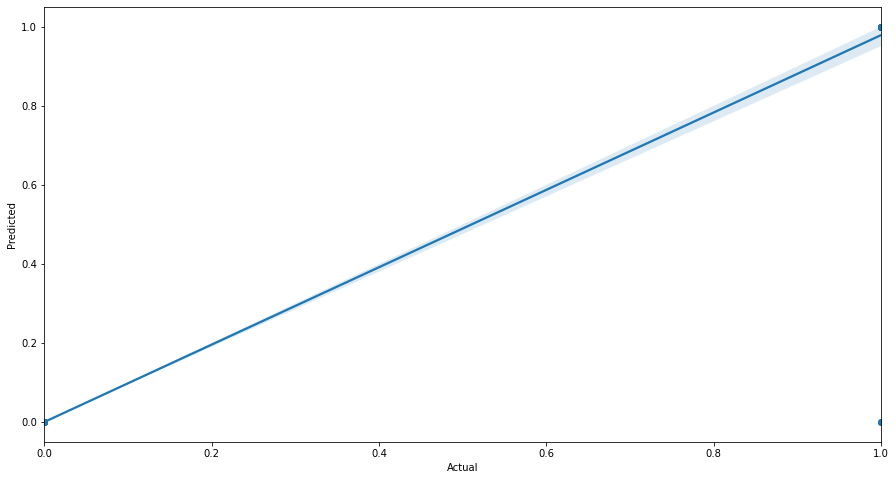

In [37]:
plt.figure(figsize=(15,8))
sns.regplot(y_test,y_pred,fit_reg =True)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

## XGBoost

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       740
           1       0.97      0.97      0.97       142

    accuracy                           0.99       882
   macro avg       0.98      0.98      0.98       882
weighted avg       0.99      0.99      0.99       882

Train Recall Score XGB : 0.9996620479891856
Test Recall Score XGB : 0.971830985915493


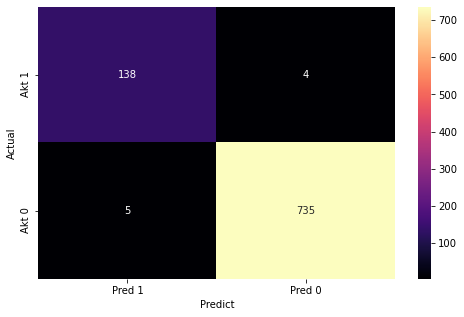

In [38]:
XGB = XGBClassifier()
XGB.fit(X_train_sm, y_train_sm)
y_pred= XGB.predict(X_test)
y_pred_train = XGB.predict(X_train_sm)

acc_XGB = accuracy_score(y_test, y_pred)
prec_XGB = precision_score(y_test, y_pred)
rec_XGB_test = recall_score(y_test, y_pred, pos_label=1)
rec_XGB_train= recall_score(y_train_sm, y_pred_train)
f1_XGB = f1_score(y_test, y_pred)
recall_score(y_test, y_pred, pos_label=0)
print(classification_report(y_test, y_pred))

print(f"Train Recall Score XGB : {rec_XGB_train}")
print(f"Test Recall Score XGB : {rec_XGB_test}")

plt.subplots(figsize=(8,5))
cm = confusion_matrix(y_test, y_pred, labels=[1, 0])
df_cm = pd.DataFrame(data=cm, columns=['Pred 1', 'Pred 0'], index = ['Akt 1', 'Akt 0'])
sns.heatmap(df_cm, cmap= 'magma', fmt= '.0f', annot=True)
plt.xlabel("Predict")
plt.ylabel("Actual")
plt.show()

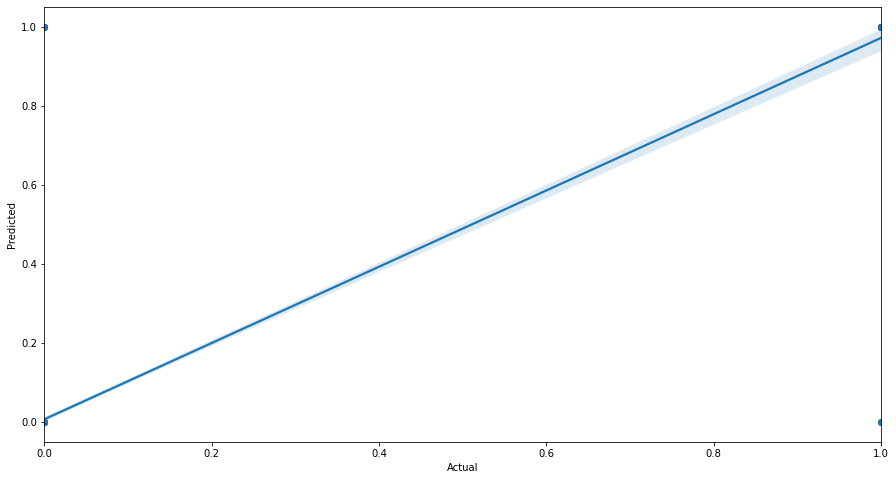

In [39]:
plt.figure(figsize=(15,8))
sns.regplot(y_test,y_pred,fit_reg =True)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

## Decision Tree Classifier

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       740
           1       0.91      0.98      0.95       142

    accuracy                           0.98       882
   macro avg       0.96      0.98      0.97       882
weighted avg       0.98      0.98      0.98       882

Train Recall Score DT : 1.0
Test Recall Score DT : 0.9788732394366197


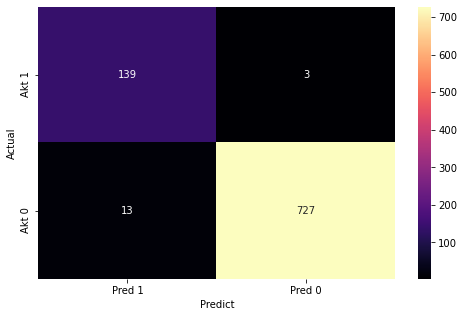

In [40]:
DT = DecisionTreeClassifier()
DT.fit(X_train_sm, y_train_sm)
y_pred= DT.predict(X_test)
y_pred_train = DT.predict(X_train_sm)

acc_DT = accuracy_score(y_test, y_pred)
prec_DT = precision_score(y_test, y_pred)
rec_DT_test = recall_score(y_test, y_pred, pos_label=1)
rec_DT_train= recall_score(y_train_sm, y_pred_train)
f1_DT = f1_score(y_test, y_pred)
recall_score(y_test, y_pred, pos_label=0)
print(classification_report(y_test, y_pred))

print(f"Train Recall Score DT : {rec_DT_train}")
print(f"Test Recall Score DT : {rec_DT_test}")

plt.subplots(figsize=(8,5))
cm = confusion_matrix(y_test, y_pred, labels=[1, 0])
df_cm = pd.DataFrame(data=cm, columns=['Pred 1', 'Pred 0'], index = ['Akt 1', 'Akt 0'])
sns.heatmap(df_cm, cmap= 'magma', fmt= '.0f', annot=True)
plt.xlabel("Predict")
plt.ylabel("Actual")
plt.show()

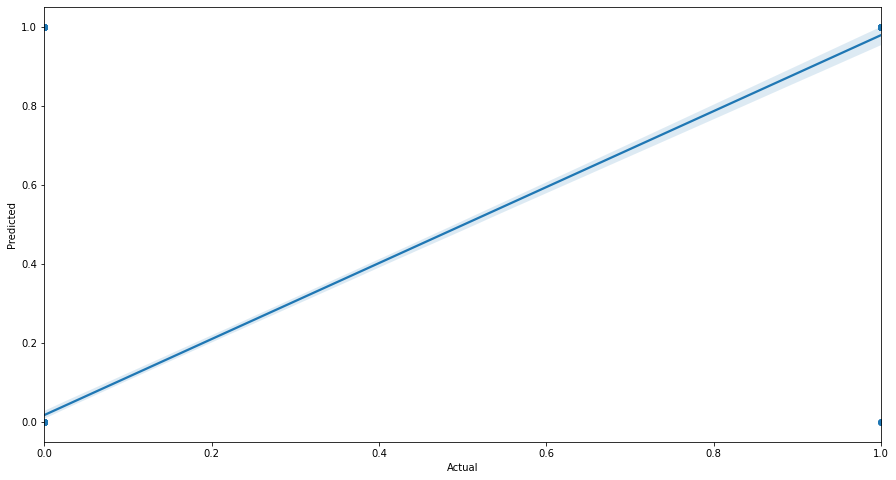

In [41]:
plt.figure(figsize=(15,8))
sns.regplot(y_test,y_pred,fit_reg =True)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [42]:
result_basemodel = {
    "LogReg": [rec_LogReg_test, rec_LogReg_train],
    "KNN": [rec_KNN_test, rec_KNN_train],
    "RF" : [rec_RF_test, rec_RF_train],
    "XGB" : [rec_XGB_test, rec_XGB_train],
    "DT": [rec_DT_test, rec_DT_train] }

pd.DataFrame(data = result_basemodel, index = ['Recall Test', 'Recall Train'])

,LogReg,KNN,RF,XGB,DT
Recall Test,0.626761,0.774648,0.978873,0.971831,0.978873
Recall Train,0.740453,0.895235,1.000000,0.999662,1.000000


# Hyper Parameter Tuning

## Logistic Regression + Tuning

In [43]:
LogReg_tuned= LogisticRegression()
param_LogReg = {'penalty' :['l1','l2', 'elasticnet', 'none'],
                'C' : [1, 0.5, 0.1, 0.05],
                'class_weight' : ['balanced'],
               'max_iter' : [10, 100, 1000]}

model_LogReg_tuned = GridSearchCV(estimator = LogReg_tuned, param_grid = param_LogReg, 
                                  cv = 3, n_jobs = -1 , verbose = 1, scoring = 'recall')

model_LogReg_tuned.fit(X_train_sm_rs, y_train_sm)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:    4.6s finished


GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [1, 0.5, 0.1, 0.05], 'class_weight': ['balanced'],
                         'max_iter': [10, 100, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none']},
             scoring='recall', verbose=1)

In [44]:
model_LogReg_tuned.best_estimator_

LogisticRegression(C=0.5, class_weight='balanced')

              precision    recall  f1-score   support

           0       0.91      0.73      0.81       740
           1       0.31      0.63      0.41       142

    accuracy                           0.71       882
   macro avg       0.61      0.68      0.61       882
weighted avg       0.81      0.71      0.74       882

Train Recall Score LogReg Tuned : 0.7404528556944914
Test Recall Score LogReg Tuned: 0.6267605633802817


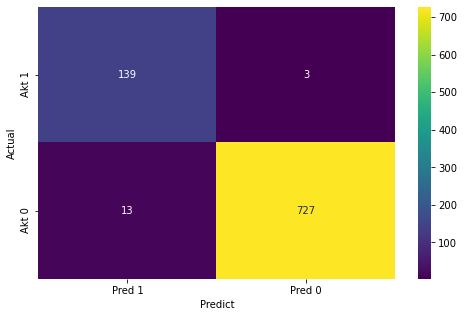

,Pred 1,Pred 0
Akt 1,139,3
Akt 0,13,727


In [48]:
LogReg_tuned= model_LogReg_tuned.best_estimator_
y_pred_LogReg_tuned= LogReg_tuned.predict(X_test_rs)
y_pred_LogReg_train_tuned= LogReg_tuned.predict(X_train_sm_rs)

acc_LogReg_tuned= accuracy_score(y_test, y_pred_LogReg_tuned)
prec_LogReg_tuned= precision_score(y_test, y_pred_LogReg_tuned)
rec_LogReg_test_tuned= recall_score(y_test, y_pred_LogReg_tuned, pos_label=1)
rec_LogReg_train_tuned= recall_score(y_train_sm, y_pred_LogReg_train_tuned)
f1_LogReg_tuned= f1_score(y_test, y_pred)
recall_score(y_test, y_pred_LogReg_tuned, pos_label=0)
print(classification_report(y_test, y_pred_LogReg_tuned))

print(f"Train Recall Score LogReg Tuned : {rec_LogReg_train_tuned}")
print(f"Test Recall Score LogReg Tuned: {rec_LogReg_test_tuned}")

plt.subplots(figsize=(8,5))
cm = confusion_matrix(y_test, y_pred, labels=[1, 0])
df_cm = pd.DataFrame(data=cm, columns=['Pred 1', 'Pred 0'], index = ['Akt 1', 'Akt 0'])
sns.heatmap(df_cm, cmap= 'viridis', fmt= '.0f', annot=True)
plt.xlabel("Predict")
plt.ylabel("Actual")
plt.show()

df_cm

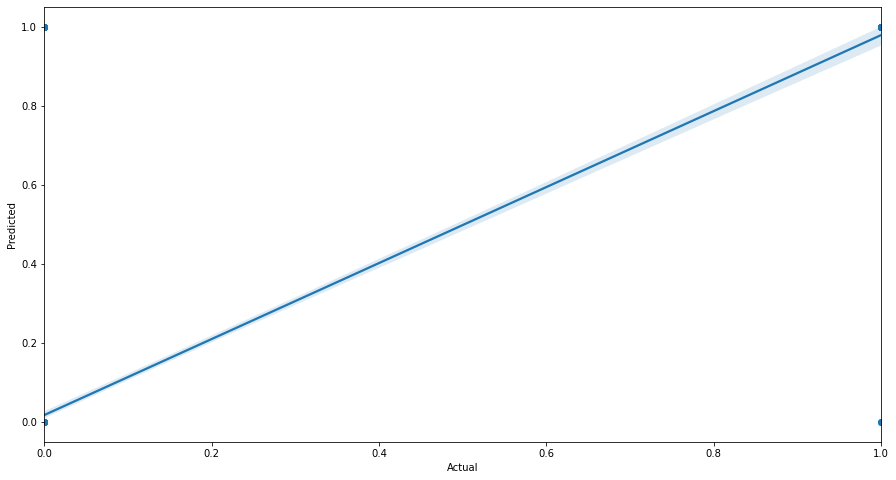

In [49]:
plt.figure(figsize=(15,8))
sns.regplot(y_test,y_pred,fit_reg =True)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

## K Nearest Neighbor + Tuning

In [68]:
KNN_tuned = KNeighborsClassifier()
param_KNN = {'n_neighbors': [1, 3, 5, 7, 9, 15],
            'weights': ['distance'],
            'p': [2,1, 0.2],
             'leaf_size' : [1, 5, 15],
            'algorithm': ['kd_tree']}

model_KNN_tuned = GridSearchCV(estimator = KNN_tuned, param_grid = param_KNN, cv = 3, 
                          n_jobs = -1 , verbose = 1, scoring = 'recall')

model_KNN_tuned.fit(X_train_sm, y_train_sm)

Fitting 3 folds for each of 54 candidates, totalling 162 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed:    1.6s finished


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['kd_tree'], 'leaf_size': [1, 5, 15],
                         'n_neighbors': [1, 3, 5, 7, 9, 15], 'p': [2, 1, 0.2],
                         'weights': ['distance']},
             scoring='recall', verbose=1)

In [69]:
model_KNN_tuned.best_estimator_

KNeighborsClassifier(algorithm='kd_tree', leaf_size=15, n_neighbors=1, p=1,
                     weights='distance')

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       740
           1       0.96      1.00      0.98       142

    accuracy                           0.99       882
   macro avg       0.98      1.00      0.99       882
weighted avg       0.99      0.99      0.99       882

Train Recall Score KNN Tuned : 1.0
Test Recall Score KNN Tuned: 1.0


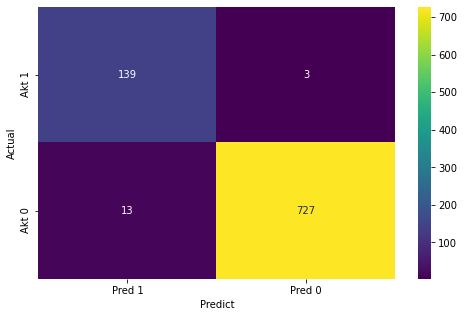

,Pred 1,Pred 0
Akt 1,139,3
Akt 0,13,727


In [70]:
KNN_tuned= model_KNN_tuned.best_estimator_
y_pred_KNN_tuned= KNN_tuned.predict(X_test)
y_pred_KNN_train_tuned= KNN_tuned.predict(X_train_sm)

acc_KNN_tuned= accuracy_score(y_test, y_pred_KNN_tuned)
prec_KNN_tuned= precision_score(y_test, y_pred_KNN_tuned)
rec_KNN_test_tuned= recall_score(y_test, y_pred_KNN_tuned, pos_label=1)
rec_KNN_train_tuned= recall_score(y_train_sm, y_pred_KNN_train_tuned)
f1_KNN_tuned= f1_score(y_test, y_pred_KNN_tuned)
recall_score(y_test, y_pred_KNN_tuned, pos_label=0)
print(classification_report(y_test, y_pred_KNN_tuned))

print(f"Train Recall Score KNN Tuned : {rec_KNN_train_tuned}")
print(f"Test Recall Score KNN Tuned: {rec_KNN_test_tuned}")

plt.subplots(figsize=(8,5))
cm = confusion_matrix(y_test, y_pred, labels=[1, 0])
df_cm = pd.DataFrame(data=cm, columns=['Pred 1', 'Pred 0'], index = ['Akt 1', 'Akt 0'])
sns.heatmap(df_cm, cmap= 'viridis', fmt= '.0f', annot=True)
plt.xlabel("Predict")
plt.ylabel("Actual")
plt.show()

df_cm

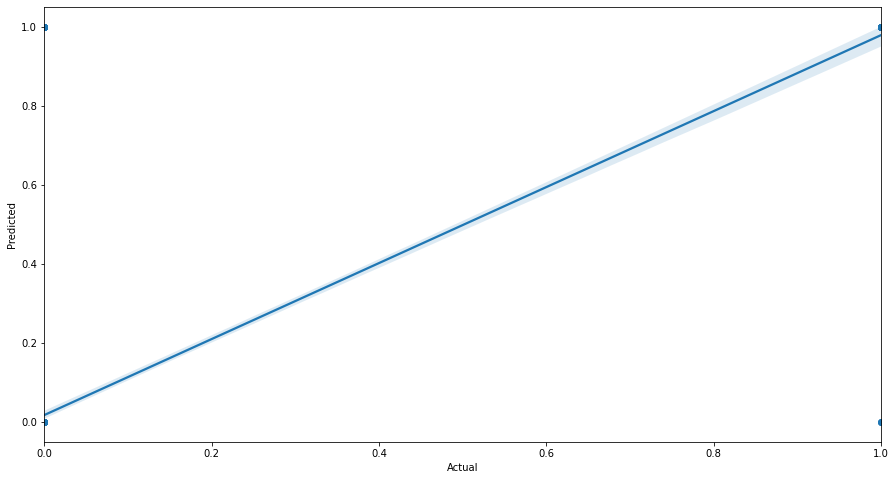

In [71]:
plt.figure(figsize=(15,8))
sns.regplot(y_test,y_pred,fit_reg =True)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

## Random Forest Classifier + Tuning

In [73]:
RF_tuned = RandomForestClassifier()
param_RF = {'n_estimators': [10, 25, 50, 100],
            'criterion' : ['gini', 'entropy'],
            "max_depth": [None, 1, 5, 7, 10],
            'min_samples_split' : [2, 5, 25],
            'min_samples_leaf' : [1, 2, 10]}

model_RF_tuned = GridSearchCV(estimator = RF_tuned, param_grid = param_RF, cv = 3, 
                          n_jobs = -1 , verbose = 1, scoring = 'recall')

model_RF_tuned.fit(X_train_sm, y_train_sm)

Fitting 3 folds for each of 360 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done 208 tasks      | elapsed:   25.2s
[Parallel(n_jobs=-1)]: Done 458 tasks      | elapsed:   51.3s
[Parallel(n_jobs=-1)]: Done 808 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:  1.9min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 1, 5, 7, 10],
                         'min_samples_leaf': [1, 2, 10],
                         'min_samples_split': [2, 5, 25],
                         'n_estimators': [10, 25, 50, 100]},
             scoring='recall', verbose=1)

In [74]:
model_RF_tuned.best_estimator_

RandomForestClassifier()

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       740
           1       0.91      0.98      0.95       142

    accuracy                           0.98       882
   macro avg       0.96      0.98      0.97       882
weighted avg       0.98      0.98      0.98       882

Train Recall Score RF Tuned : 1.0
Test Recall Score RF Tuned: 0.9788732394366197


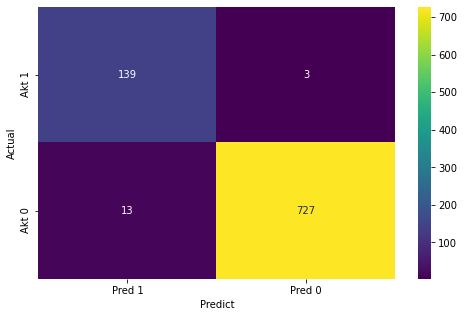

,Pred 1,Pred 0
Akt 1,139,3
Akt 0,13,727


In [79]:
RF_tuned= model_RF_tuned.best_estimator_
y_pred_RF_tuned= RF_tuned.predict(X_test)
y_pred_RF_train_tuned= RF_tuned.predict(X_train_sm)

acc_RF_tuned= accuracy_score(y_test, y_pred_RF_tuned)
prec_RF_tuned= precision_score(y_test, y_pred_RF_tuned)
rec_RF_test_tuned= recall_score(y_test, y_pred_RF_tuned, pos_label=1)
rec_RF_train_tuned= recall_score(y_train_sm, y_pred_RF_train_tuned)
f1_RF_tuned= f1_score(y_test, y_pred_RF_tuned)
recall_score(y_test, y_pred_RF_tuned, pos_label=0)
print(classification_report(y_test, y_pred))

print(f"Train Recall Score RF Tuned : {rec_RF_train_tuned}")
print(f"Test Recall Score RF Tuned: {rec_RF_test_tuned}")

plt.subplots(figsize=(8,5))
cm = confusion_matrix(y_test, y_pred, labels=[1, 0])
df_cm = pd.DataFrame(data=cm, columns=['Pred 1', 'Pred 0'], index = ['Akt 1', 'Akt 0'])
sns.heatmap(df_cm, cmap= 'viridis', fmt= '.0f', annot=True)
plt.xlabel("Predict")
plt.ylabel("Actual")
plt.show()

df_cm

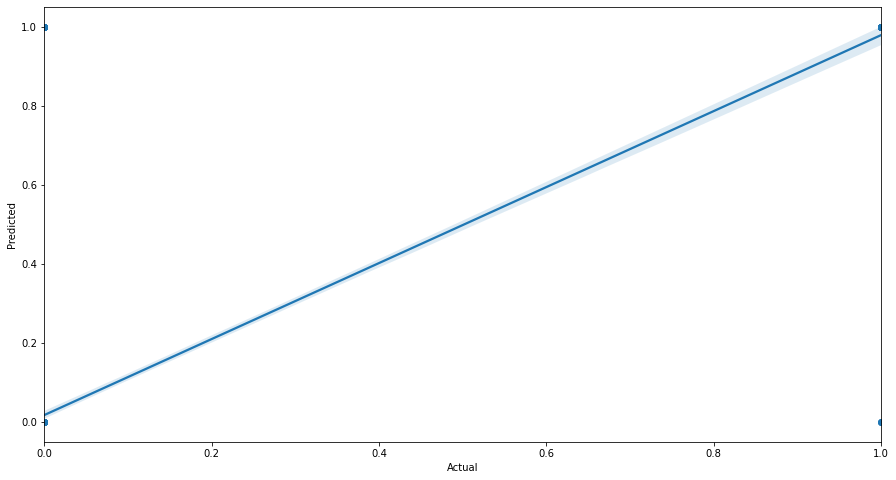

In [80]:
plt.figure(figsize=(15,8))
sns.regplot(y_test,y_pred,fit_reg =True)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

## XGBoost + Tuning

In [97]:
XGB_tuned = XGBClassifier()
param_XGB ={'max_depth': [1, 7, 1.5, 6] ,
             'n_estimators': [10, 20, 30, 50, 70, 100], 
             'gamma': [0, 2, 0.5, 1]}

model_XGB_tuned = GridSearchCV(estimator = XGB_tuned, param_grid = param_XGB, cv = 3, 
                          n_jobs = -1 , verbose = 1, scoring = 'recall')

model_XGB_tuned.fit(X_train_sm, y_train_sm)

Fitting 3 folds for each of 96 candidates, totalling 288 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 288 out of 288 | elapsed:   16.2s finished


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None,

In [98]:
model_XGB_tuned.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       740
           1       0.91      0.98      0.95       142

    accuracy                           0.98       882
   macro avg       0.96      0.98      0.97       882
weighted avg       0.98      0.98      0.98       882

Train Recall Score XGB Tuned : 0.9996620479891856
Test Recall Score XGB Tuned: 0.971830985915493


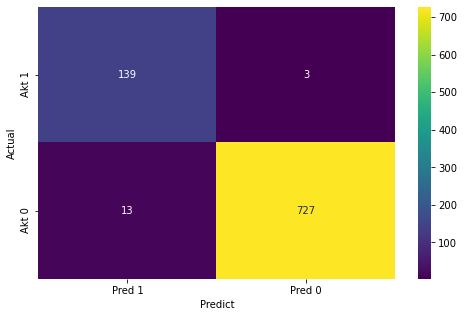

,Pred 1,Pred 0
Akt 1,139,3
Akt 0,13,727


In [99]:
XGB_tuned= model_XGB_tuned.best_estimator_
y_pred_XGB_tuned= XGB_tuned.predict(X_test)
y_pred_XGB_train_tuned= XGB_tuned.predict(X_train_sm)

acc_XGB_tuned= accuracy_score(y_test, y_pred_XGB_tuned)
prec_XGB_tuned= precision_score(y_test, y_pred_XGB_tuned)
rec_XGB_test_tuned= recall_score(y_test, y_pred_XGB_tuned, pos_label=1)
rec_XGB_train_tuned= recall_score(y_train_sm, y_pred_XGB_train_tuned)
f1_XGB_tuned= f1_score(y_test, y_pred_XGB_tuned)
recall_score(y_test, y_pred_XGB_tuned, pos_label=0)
print(classification_report(y_test, y_pred))

print(f"Train Recall Score XGB Tuned : {rec_XGB_train_tuned}")
print(f"Test Recall Score XGB Tuned: {rec_XGB_test_tuned}")

plt.subplots(figsize=(8,5))
cm = confusion_matrix(y_test, y_pred, labels=[1, 0])
df_cm = pd.DataFrame(data=cm, columns=['Pred 1', 'Pred 0'], index = ['Akt 1', 'Akt 0'])
sns.heatmap(df_cm, cmap= 'viridis', fmt= '.0f', annot=True)
plt.xlabel("Predict")
plt.ylabel("Actual")
plt.show()

df_cm

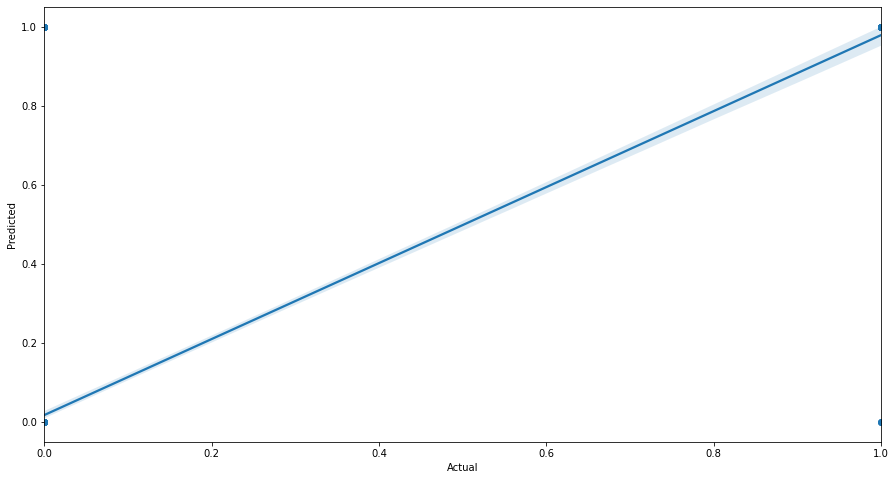

In [100]:
plt.figure(figsize=(15,8))
sns.regplot(y_test,y_pred,fit_reg =True)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

## Decision Tree Classifier + Tuning

In [84]:
DT_tuned = DecisionTreeClassifier()
param_DT = {"max_depth": [1, 2, 3, 4, None],
            "criterion": ["gini", "entropy"] 
           }

model_DT_tuned = GridSearchCV(estimator = DT_tuned, param_grid = param_DT, cv = 3, 
                          n_jobs = -1 , verbose = 1, scoring = 'recall')

model_DT_tuned.fit(X_train_sm, y_train_sm)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.6s finished


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, None]},
             scoring='recall', verbose=1)

In [85]:
model_DT_tuned.best_estimator_

DecisionTreeClassifier(criterion='entropy')

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       740
           1       0.91      0.98      0.95       142

    accuracy                           0.98       882
   macro avg       0.96      0.98      0.97       882
weighted avg       0.98      0.98      0.98       882

Train Recall Score DT Tuned : 1.0
Test Recall Score DT Tuned: 0.9507042253521126


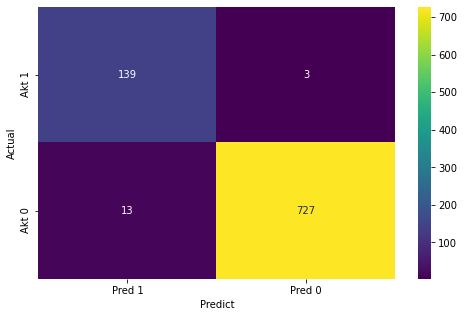

,Pred 1,Pred 0
Akt 1,139,3
Akt 0,13,727


In [86]:
DT_tuned= model_DT_tuned.best_estimator_
y_pred_DT_tuned= DT_tuned.predict(X_test)
y_pred_DT_train_tuned= DT_tuned.predict(X_train_sm)

acc_DT_tuned= accuracy_score(y_test, y_pred_DT_tuned)
prec_DT_tuned= precision_score(y_test, y_pred_DT_tuned)
rec_DT_test_tuned= recall_score(y_test, y_pred_DT_tuned, pos_label=1)
rec_DT_train_tuned= recall_score(y_train_sm, y_pred_DT_train_tuned)
f1_DT_tuned= f1_score(y_test, y_pred_DT_tuned)
recall_score(y_test, y_pred_DT_tuned, pos_label=0)
print(classification_report(y_test, y_pred))

print(f"Train Recall Score DT Tuned : {rec_DT_train_tuned}")
print(f"Test Recall Score DT Tuned: {rec_DT_test_tuned}")

plt.subplots(figsize=(8,5))
cm = confusion_matrix(y_test, y_pred, labels=[1, 0])
df_cm = pd.DataFrame(data=cm, columns=['Pred 1', 'Pred 0'], index = ['Akt 1', 'Akt 0'])
sns.heatmap(df_cm, cmap= 'viridis', fmt= '.0f', annot=True)
plt.xlabel("Predict")
plt.ylabel("Actual")
plt.show()

df_cm

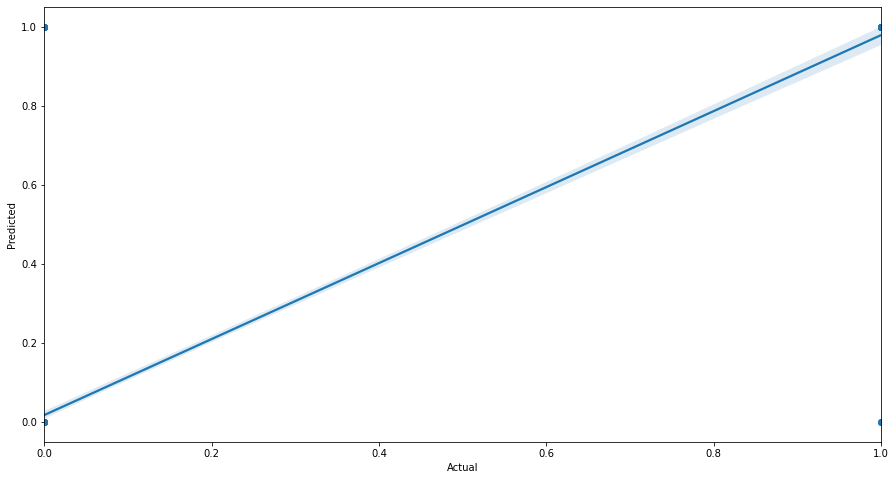

In [87]:
plt.figure(figsize=(15,8))
sns.regplot(y_test,y_pred,fit_reg =True)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

# Comparing Model

In [110]:
result_AllModel = {
    "LogReg": [prec_LogReg, rec_LogReg_test, rec_LogReg_train],
    "LogReg_tuned": [prec_LogReg_tuned, rec_LogReg_test_tuned, rec_LogReg_train_tuned],
    "KNN": [prec_KNN, rec_KNN_test, rec_KNN_train],
    "KNN_tuned": [prec_KNN_tuned, rec_KNN_test_tuned, rec_KNN_train_tuned],
    "RF" : [prec_RF, rec_RF_test, rec_RF_train],
    "RF_tuned" : [prec_RF_tuned, rec_RF_test_tuned, rec_RF_train_tuned],
    "XGB" : [prec_XGB, rec_XGB_test, rec_XGB_train],
    "XGB_tuned" : [prec_XGB_tuned, rec_XGB_test_tuned, rec_XGB_train_tuned],
    "DT": [prec_DT, rec_DT_test, rec_DT_train],
    "DT_tuned": [prec_DT_tuned, rec_DT_test_tuned, rec_DT_train_tuned] }

pd.DataFrame(data = result_AllModel, index = ['Precision', 'Recall Test', 'Recall Train']).T

,Precision,Recall Test,Recall Train
LogReg,0.305842,0.626761,0.740453
LogReg_tuned,0.305842,0.626761,0.740453
KNN,0.395683,0.774648,0.895235
KNN_tuned,0.959459,1.000000,1.000000
RF,1.000000,0.978873,1.000000
RF_tuned,0.992857,0.978873,1.000000
XGB,0.965035,0.971831,0.999662
XGB_tuned,0.965035,0.971831,0.999662
DT,0.914474,0.978873,1.000000
DT_tuned,0.900000,0.950704,1.000000


We will using RF_tuned as our best model

# Proba Test

In [102]:
X_train.head()

,EnvironmentSatisfaction,JobSatisfaction,Age,BusinessTravel,MonthlyIncome,TotalWorkingYears,YearsAtCompany,YearsWithCurrManager,WorkingHours
3465,2,3,41,1,52570,10,10,8,8
3485,3,4,34,0,26960,6,0,0,7
3052,3,2,21,1,53730,1,1,0,6
2012,1,2,28,2,29760,1,1,0,6
426,1,2,40,1,192320,11,1,0,6


In [113]:
X_train.nunique()

EnvironmentSatisfaction       4
JobSatisfaction               4
Age                          43
BusinessTravel                3
MonthlyIncome              1337
TotalWorkingYears            40
YearsAtCompany               37
YearsWithCurrManager         18
WorkingHours                  6
dtype: int64

In [114]:
X_train.drop_duplicates().sample(4).values

array([[    3,     4,    34,     1, 23230,     4,     3,     2,     7],
       [    4,     3,    37,     1, 56470,     7,     0,     0,     9],
       [    4,     3,    32,     2, 50700,    10,     8,     7,     9],
       [    2,     4,    34,     1, 53810,    10,    10,     8,     8]])

In [118]:
dfDesc = []

for i in X_train.columns:
    dfDesc.append([
        i,
        X_train[i].dtypes,
        X_train[i].isna().sum(),
        (((X_train[i].isna().sum()) / len(X_train)) * 100).round(2),
        X_train[i].nunique(),
        X_train[i].drop_duplicates().sample(3).values
    ])

In [119]:
pd.DataFrame(dfDesc, columns= ['Data Features', 'Data Type', 'Null', 'Null (%)', 'Unique', 'Unique Sample'])

,Data Features,Data Type,Null,Null (%),Unique,Unique Sample
0,EnvironmentSatisfaction,int64,0,0.0,4,"[3, 1, 2]"
1,JobSatisfaction,int64,0,0.0,4,"[4, 1, 3]"
2,Age,int64,0,0.0,43,"[36, 28, 29]"
3,BusinessTravel,int64,0,0.0,3,"[2, 0, 1]"
4,MonthlyIncome,int64,0,0.0,1337,"[35050, 176650, 68150]"
5,TotalWorkingYears,int64,0,0.0,40,"[37, 29, 28]"
6,YearsAtCompany,int64,0,0.0,37,"[4, 3, 1]"
7,YearsWithCurrManager,int64,0,0.0,18,"[9, 14, 1]"
8,WorkingHours,int64,0,0.0,6,"[8, 9, 10]"


In [105]:
employee1= [2,4,38,3,44900,2,10,5,3]
model_RF_tuned.predict([employee1])[0]

0

In [106]:
employee2= [3,1,45,29,29730,1,10,10,4]
model_RF_tuned.predict([employee2])[0]

0

In [107]:
employee3= [3,2,55,6,26550,8,36,24,15]
model_RF_tuned.predict([employee3])[0]

0

In [108]:
employee4= [3,2,31,10,41890,0,6,5,4]
model_RF_tuned.predict([employee4])[0]

1

In [109]:
employee5= [4,3,2,37,1,0,5,20860,4,14,17,3,3,1,0,3,9]
model_RF_tuned.predict([employee1])[0]

0

# Export Model

In [111]:
joblib.dump(model_RF_tuned,'employee_attrition_RF_tuned')

['employee_attrition_RF_tuned']